In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#피쳐 스케일링 하기 전에 실행해줘야 경고가 안뜬다
import os
os.environ['OMP_NUM_THREADS'] = 1

In [2]:
dataset = pd.read_csv('KMeansData.csv')
dataset.head()  #dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [8]:
# x = dataset.iloc[:,:].values
# x = dataset.values
x = dataset.to_numpy()  #공식홈페이지 권장 
x[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

Text(0, 0.5, 'score')

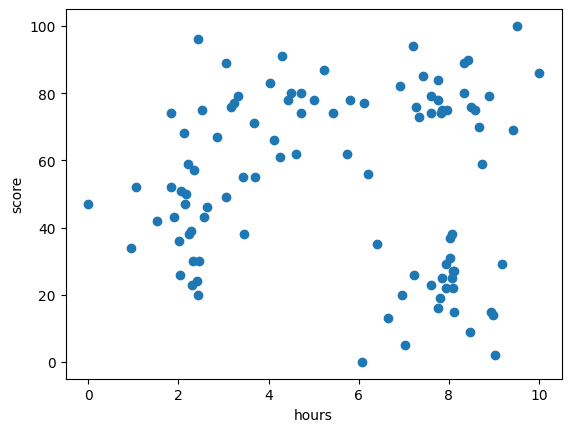

In [10]:
plt.scatter(x[:,0], x[:,1])
plt.xlabel('hours')
plt.ylabel('score')

In [11]:
# 피쳐 스케일링

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

Text(0.5, 1.0, 'feature scaled')

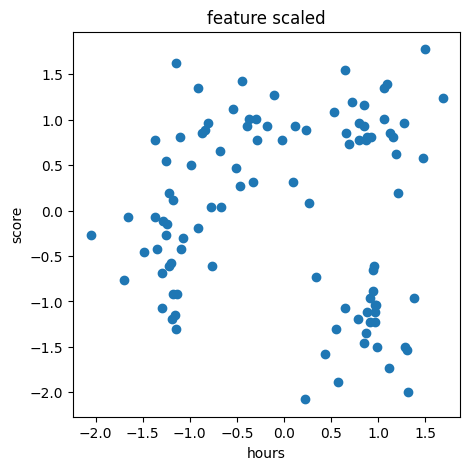

In [16]:
# 스케일링 된 데이터 시각화 
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('hours')
plt.ylabel('score')
plt.title('feature scaled')


c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

Text(0, 0.5, 'inertia')

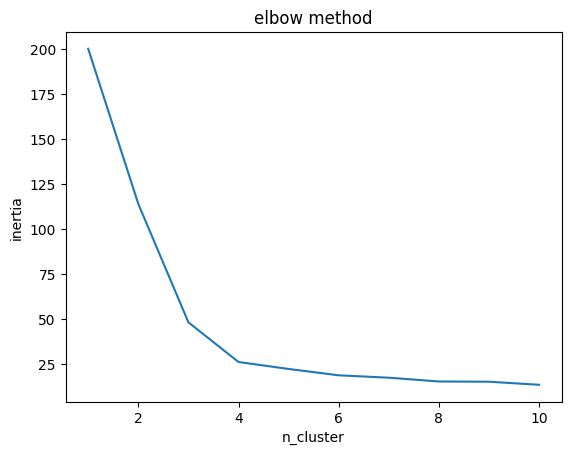

In [21]:
#최적의 k 값 찾기 (엘보우방식)

from sklearn.cluster import KMeans
inertia_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_)    #각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합
    
plt.plot(range(1,11), inertia_list)
plt.title('elbow method')
plt.xlabel('n_cluster')
plt.ylabel('inertia')

In [23]:
k = 4  #최적의 k 값

In [25]:
# 최적의 k값으로 kmeans 학습
kmeans = KMeans(n_clusters=k, random_state=0)
# kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)


c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
y_kmeans

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3])

In [28]:
centers = kmeans.cluster_centers_   #클러스터의 중심점 좌표
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

Text(0, 0.5, 'score')

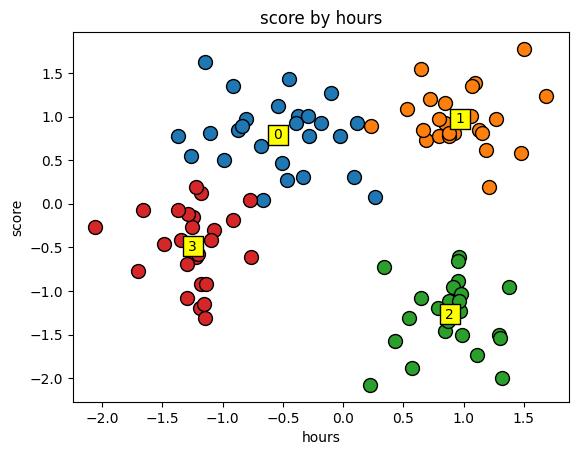

In [33]:
# 데이터시각화(최적의 k)

#전체 데이터가 4가지 그룹으로 나뉘어짐 

for cluster in range(k):
    plt.scatter(x[y_kmeans == cluster, 0], x[y_kmeans == cluster, 1],s = 100, edgecolor = 'black') #각 데이터출력
    plt.scatter(centers[cluster,0], centers[cluster,1], s = 200, edgecolors='black', color = 'yellow', marker = 's')  #중심점네모
    plt.text(centers[cluster,0], centers[cluster,1], cluster, va = 'center', ha = 'center') #클러스터를 텍스트로 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
    

In [34]:
# 스케일링된 변수를 다시 원복하기 

x_org = sc.inverse_transform(x) #feature scaling 된 데이터를 다시 원복
x_org[:5]


array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [35]:
centers_org = sc.inverse_transform(kmeans.cluster_centers_)   #클러스터의 중심점 좌표
centers_org[:5]

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

Text(0, 0.5, 'score')

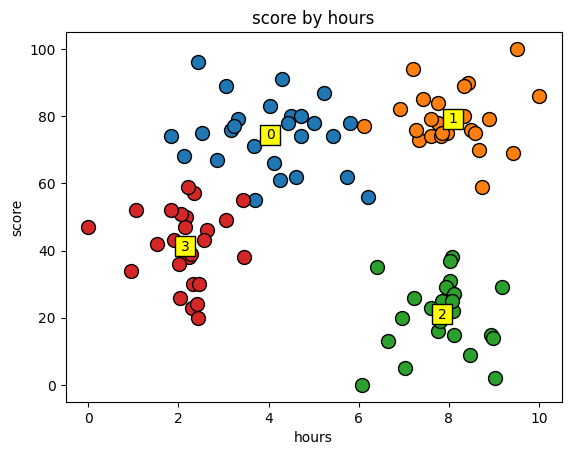

In [36]:

for cluster in range(k):
    plt.scatter(x_org[y_kmeans == cluster, 0], x_org[y_kmeans == cluster, 1],s = 100, edgecolor = 'black') #각 데이터출력
    plt.scatter(centers_org[cluster,0], centers_org[cluster,1], s = 200, edgecolors='black', color = 'yellow', marker = 's')  #중심점네모
    plt.text(centers_org[cluster,0], centers_org[cluster,1], cluster, va = 'center', ha = 'center') #클러스터를 텍스트로 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
    